### Scaling Exercises
Use the zillow dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

#### 1) Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution.

In [31]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from wrangle import wrangle_zillow
from sklearn.model_selection import train_test_split


In [2]:
#read the SQL dataset into pandas Dataframe

df = wrangle_zillow()

In [3]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,4,2.0,3633,296425,2005,6941.39,6037
6,3,4.0,1620,847770,2011,10244.94,6037
7,3,2.0,2077,646760,1926,7924.68,6037
11,0,0.0,1200,5328,1972,91.60,6037
14,0,0.0,171,6920,1973,255.17,6037


In [9]:
#splitting data into train, validate, test where train/validate are 80% and test is 20% of data
#then the train/validate data is split into train 70% and test 30%

train_validate, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train_validate, test_size=.3, random_state=123)
print(train.shape, validate.shape, test.shape)

(1172966, 7) (502700, 7) (418917, 7)


In [10]:
#looking at the column names:
train.columns

Index(['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet',
       'taxvaluedollarcnt', 'yearbuilt', 'taxamount', 'fips'],
      dtype='object')

In [11]:
#checking dtypes and nulls
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1172966 entries, 421888 to 1388143
Data columns (total 7 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   bedroomcnt                    1172966 non-null  int64  
 1   bathroomcnt                   1172966 non-null  float64
 2   calculatedfinishedsquarefeet  1172966 non-null  int64  
 3   taxvaluedollarcnt             1172966 non-null  int64  
 4   yearbuilt                     1172966 non-null  int64  
 5   taxamount                     1172966 non-null  float64
 6   fips                          1172966 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 71.6 MB


In [12]:
#ONTO SCALING....I'll be pulling out the columns I want to use in my scales
columns_to_scale = ['bedroomcnt','bathroomcnt','calculatedfinishedsquarefeet','taxvaluedollarcnt']

<i> MIN-MAX SCALING:

In [13]:
#using a modified copy of the list, will use Min-Max scaling
#MUST fit scaling to the train columns I am wanting to scale (ie columns_to_scale)
train_scaled = train.copy()
scaler = MinMaxScaler()

#A copy of train.                 #adding sklearn scaler.fit_transform to scale wanted columns
train_scaled[columns_to_scale] = scaler.fit_transform(train[columns_to_scale])

In [14]:
#let's see what these columns look like now
train_scaled

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
421888,0.500000,0.333333,0.002916,0.178516,1961,4418.72,6037
548087,0.500000,0.583333,0.003387,0.143884,1996,2798.18,6059
714717,0.500000,0.333333,0.002901,0.294375,1923,7210.51,6037
749704,0.500000,0.166667,0.002122,0.145489,1952,3622.02,6037
539577,0.000000,0.166667,0.000744,0.017260,1942,579.61,6037
...,...,...,...,...,...,...,...
83961,0.500000,0.416667,0.004630,0.231666,1966,5183.18,6059
828457,0.333333,0.250000,0.002241,0.258892,1987,5353.78,6059
722901,0.500000,0.333333,0.003302,0.239030,1944,5785.01,6037
821001,0.500000,0.166667,0.002235,0.036479,1947,482.63,6037


In [15]:
#vs train
train

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
421888,3,2.0,1550,357034,1961,4418.72,6037
548087,3,3.5,1800,287774,1996,2798.18,6059
714717,3,2.0,1542,588738,1923,7210.51,6037
749704,3,1.0,1128,290984,1952,3622.02,6037
539577,0,1.0,396,34541,1942,579.61,6037
...,...,...,...,...,...,...,...
83961,3,2.5,2460,463327,1966,5183.18,6059
828457,2,1.5,1191,517777,1987,5353.78,6059
722901,3,2.0,1755,478054,1944,5785.01,6037
821001,3,1.0,1188,72975,1947,482.63,6037


Text(0, 0.5, 'Count')

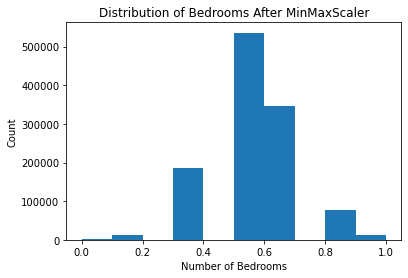

In [16]:
#now that our data is in similar scales, we can plot this out using histogram to visual note any relations
plt.hist(train_scaled.bedroomcnt)
plt.title('Distribution of Bedrooms After MinMaxScaler')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

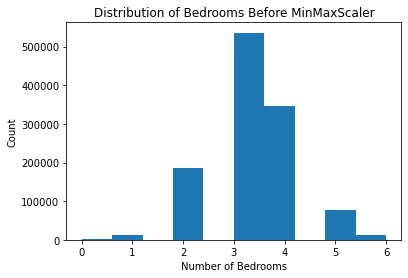

In [17]:
#what the data was like prior to scaling...
plt.hist(train.bedroomcnt)
plt.title('Distribution of Bedrooms Before MinMaxScaler')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')

Text(0.5, 1.0, 'Scaled')

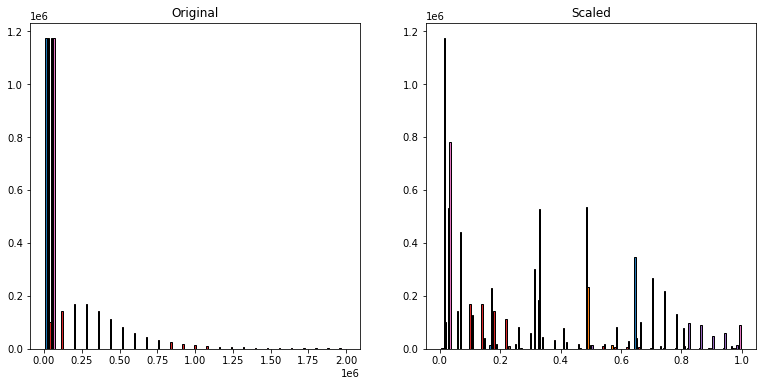

In [25]:
#side by side (code from manual)
scaler = sklearn.preprocessing.MinMaxScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(train)

x_train_scaled = scaler.transform(train)
x_validate_scaled = scaler.transform(validate)
x_test_scaled = scaler.transform(test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='black')
plt.title('Scaled')
#this plot shows more of a distribution happening after the scale....

In [26]:
#creating a function that will visually apply each scaler to the train df

def visualize_scaler(scaler, df, columns_to_scale, bins=10):
    fig, axs = plt.subplots(len(columns_to_scale), 2, figsize=(16,9))
    df_scaled = df.copy()
    df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
    for (ax1, ax2), col in zip(axs, columns_to_scale):
        ax1.hist(df[col], bins=bins)
        ax1.set(title=f'{col} before scaling', xlabel=col, ylabel='count')
        ax2.hist(df_scaled[col], bins=bins)
        ax2.set(title=f'{col} after scaling with {scaler.__class__.__name__}', xlabel=col, ylabel='count')
    plt.tight_layout()
#    return fig, axs

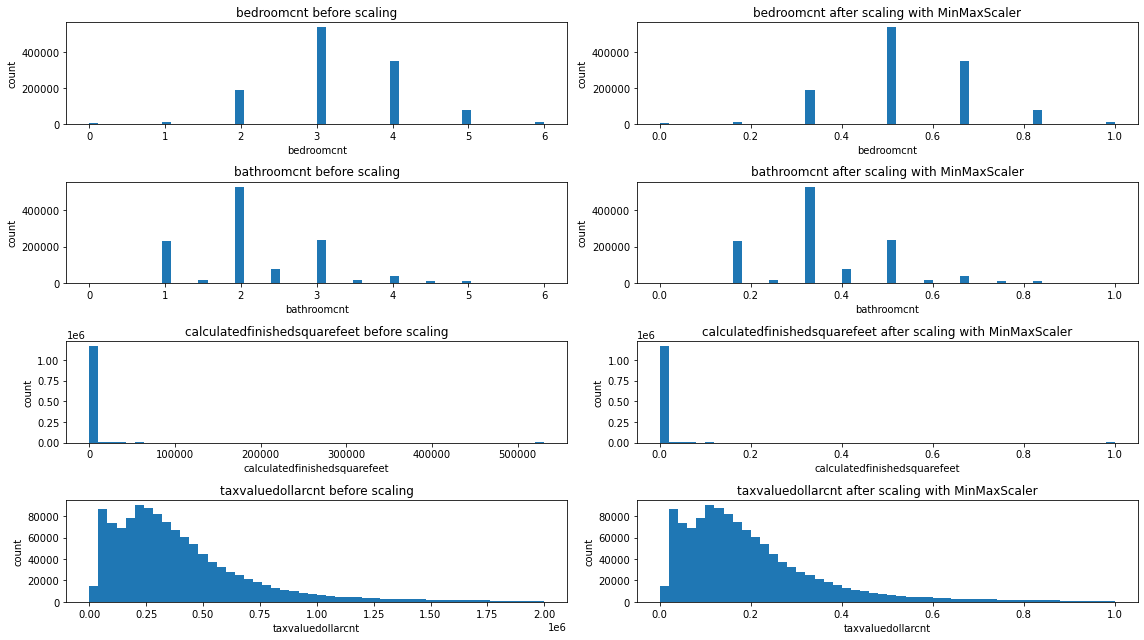

In [27]:
# MinMaxScaler Applied
visualize_scaler(scaler=MinMaxScaler(), df=train, columns_to_scale=columns_to_scale, bins=50)

### TAKEAWAYS:
Note: MinMax is a linear scaling, meaning that the shape we will see even after changing what kind of scale to variables, will more than likely stay the same. Between the above two plots, I would rather use the un-scaled data for something like this. 

_________________________________________________________________________

<i> STANDARD SCALER:

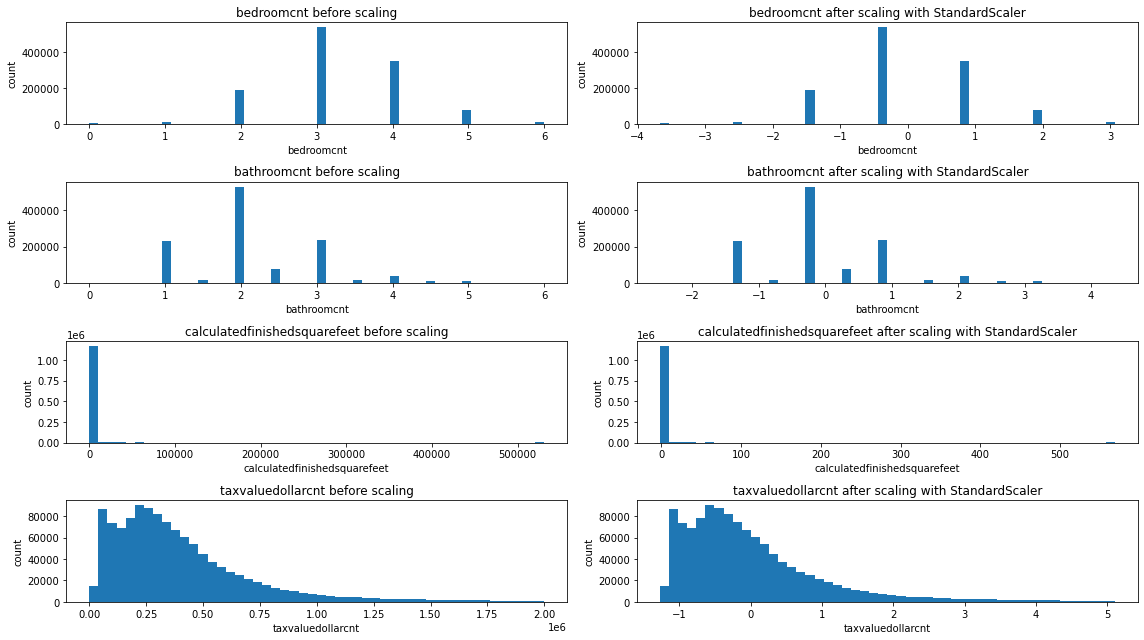

In [28]:
# StandardScaler Applied
visualize_scaler(scaler=StandardScaler(), df=train, columns_to_scale=columns_to_scale, bins=50)


<i> ROBUSTSCALER:

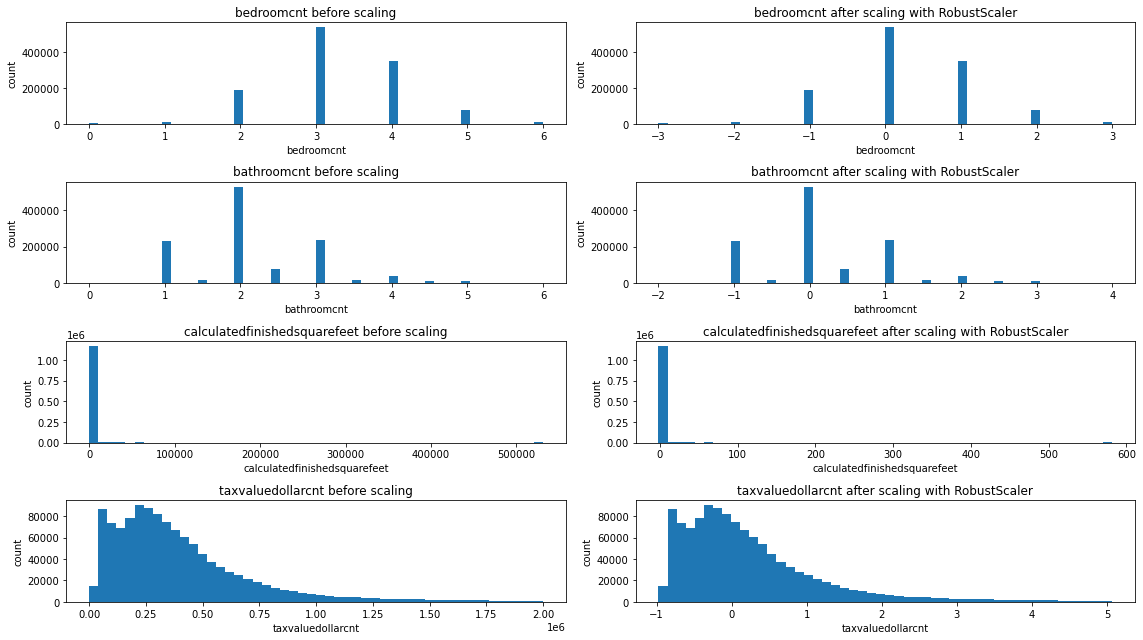

In [29]:
# RobustScaler Applied
visualize_scaler(scaler=RobustScaler(), df=train, columns_to_scale=columns_to_scale, bins=50)

In [34]:
train.columns

Index(['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet',
       'taxvaluedollarcnt', 'yearbuilt', 'taxamount', 'fips'],
      dtype='object')

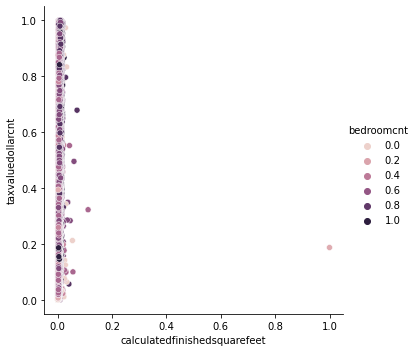

In [38]:
#what's going on with the data? (square foot and value of property, with bedroom count as hue)
#Scaled version:
sns.relplot(data=train_scaled, y='taxvaluedollarcnt', x ='calculatedfinishedsquarefeet', hue='bedroomcnt')

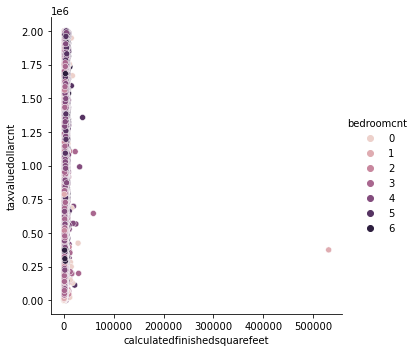

In [40]:
#Not Scaled version
sns.relplot(data=train, y='taxvaluedollarcnt', x='calculatedfinishedsquarefeet', hue='bedroomcnt')

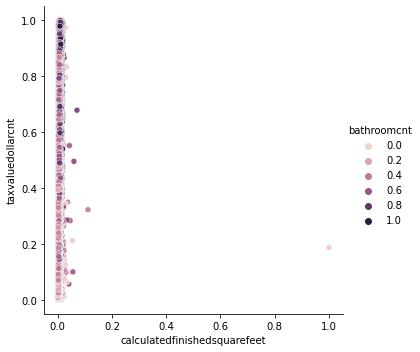

In [41]:
#what's going on with the data?
sns.relplot(data=train_scaled, y='taxvaluedollarcnt', x='calculatedfinishedsquarefeet', hue='bathroomcnt')

#### 2) Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [42]:
#we will just look at the tax value count column as an array
scaler = MinMaxScaler()
original_data = train[['taxvaluedollarcnt']]
scaled_data = scaler.fit_transform(original_data)

In [43]:
#scaled data results
scaled_data[:5]

array([[0.17851618],
       [0.1438842 ],
       [0.29437478],
       [0.14548929],
       [0.01726048]])

In [44]:
#original data results
original_data[:5]

,taxvaluedollarcnt
421888,357034
548087,287774
714717,588738
749704,290984
539577,34541


#### Let's inverse the scale!

In [45]:
scaler.inverse_transform(scaled_data)[:5]

array([[357034.],
       [287774.],
       [588738.],
       [290984.],
       [ 34541.]])

In [46]:
#does it match the original data?
(scaler.inverse_transform(scaled_data) == original_data) #YES!!!

,taxvaluedollarcnt
421888,True
548087,True
714717,True
749704,True
539577,True
...,...
83961,True
828457,False
722901,True
821001,True


___________________________________________________________________________________________________________

#### 3) Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

<i>From sklearn.preprocessing.QuantileTransformer documentation:

    This method transforms the features to follow a uniform or a normal distribution. 
    
    Therefore, for a given feature, this transformation tends to spread out the most frequent values. 

    It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme.



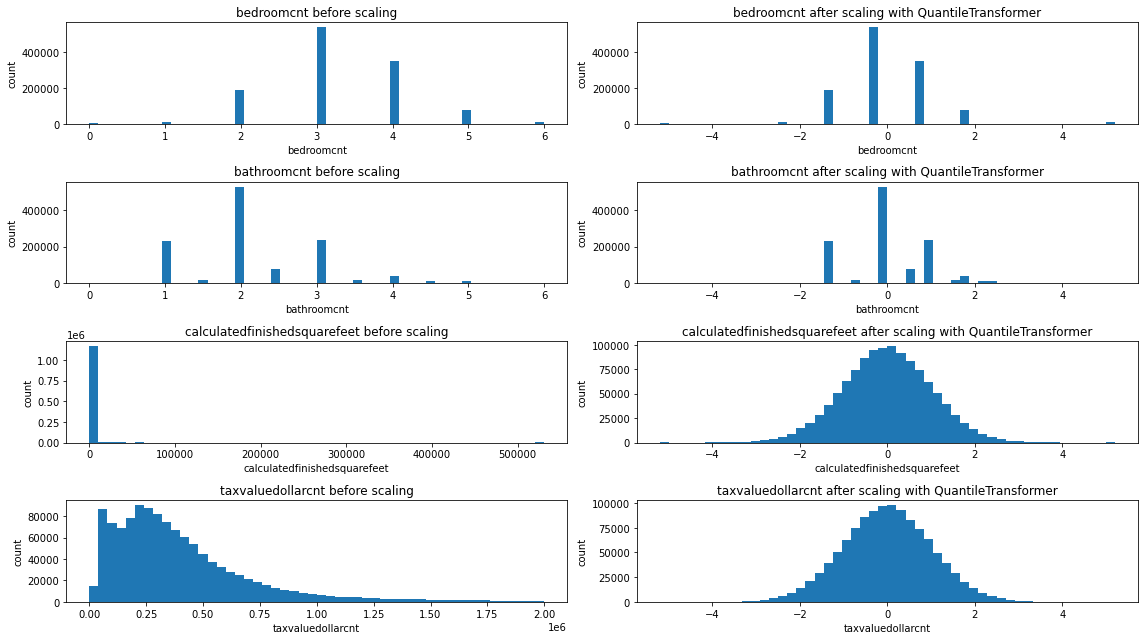

In [47]:
# QuantileTransformer Applied
visualize_scaler(scaler=QuantileTransformer(output_distribution='normal'), df=train, columns_to_scale=columns_to_scale, bins=50)

__________________________________________________________________________________________________________________

#### 4) Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

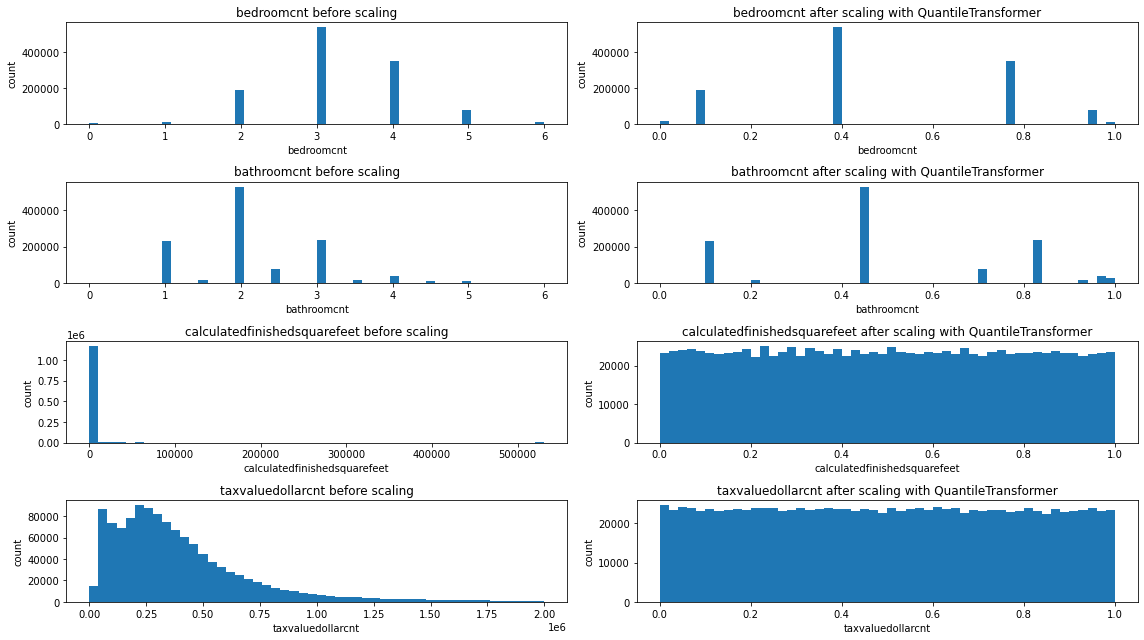

In [48]:
# QuantileTransformer Applied
visualize_scaler(scaler=QuantileTransformer(), df=train, columns_to_scale=columns_to_scale, bins=50)

#### 5) Based on the work you've done, choose a scaling method for your dataset. 

Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. 

Be sure to only learn the parameters for scaling from your training data!

### Creating a Pipeline Function:

In [49]:
def scale_data(train,
              validate,
              test,
              columns_to_scale=['bedroomcnt', 'bathroomcnt', 'taxvaluedollarcnt', 'calculatedfinishedsquarefeet'],
              return_scaler=False):
    """
    Scales the 3 data splits.
    Takes in train, validate and test data splits and then returns their scaled counterparts.
    If return_scaler is True, the scaler object will be returned as well
    """
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    
    #using MinMaxScaler (best showing distribution once scaled)
    scaler = MinMaxScaler()
    scaler.fit(train[columns_to_scale])
    
    #creating a df that puts MinMaxScaler to work on the wanted columns and returns the split datasets and counterparts
    train_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(train[columns_to_scale]),
                                                 columns=train[columns_to_scale].columns.values).set_index([train.index.values])
    
    validate_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(validate[columns_to_scale]),
                                                 columns=validate[columns_to_scale].columns.values).set_index([validate.index.values])
    
    test_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(test[columns_to_scale]),
                                                 columns=test[columns_to_scale].columns.values).set_index([test.index.values])
    
    if return_scaler:
        return scaler, train_scaled, validate_scaled, test_scaled
    else:
        return train_scaled, validate_scaled, test_scaled

In [50]:
scaler, train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test, return_scaler=True)

In [51]:
train_scaled

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
421888,0.500000,0.333333,0.002916,0.178516,1961,4418.72,6037
548087,0.500000,0.583333,0.003387,0.143884,1996,2798.18,6059
714717,0.500000,0.333333,0.002901,0.294375,1923,7210.51,6037
749704,0.500000,0.166667,0.002122,0.145489,1952,3622.02,6037
539577,0.000000,0.166667,0.000744,0.017260,1942,579.61,6037
...,...,...,...,...,...,...,...
83961,0.500000,0.416667,0.004630,0.231666,1966,5183.18,6059
828457,0.333333,0.250000,0.002241,0.258892,1987,5353.78,6059
722901,0.500000,0.333333,0.003302,0.239030,1944,5785.01,6037
821001,0.500000,0.166667,0.002235,0.036479,1947,482.63,6037


In [52]:
validate_scaled

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
566706,0.333333,0.166667,0.001964,0.093066,1930,2467.64,6037
1927312,0.500000,0.166667,0.001896,0.019093,1944,493.90,6111
1039033,0.666667,0.333333,0.002962,0.244760,1972,5658.43,6037
33716,0.333333,0.166667,0.002030,0.144106,1938,3169.20,6037
59699,0.666667,0.333333,0.002965,0.115594,1960,3336.08,6037
...,...,...,...,...,...,...,...
442484,0.833333,0.833333,0.007720,0.444343,1996,10913.11,6037
2006898,0.500000,0.500000,0.002216,0.090603,1992,2727.53,6037
84458,0.833333,0.583333,0.007706,0.417398,1990,9757.72,6059
889025,0.500000,0.333333,0.002583,0.173106,1927,4172.49,6037


In [53]:
test_scaled

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
673496,0.500000,0.166667,0.001945,0.157688,1951,4383.54,6037
1726217,0.333333,0.166667,0.001489,0.043149,1904,1100.03,6037
1706471,0.333333,0.166667,0.001753,0.033358,1948,1048.79,6037
588084,0.666667,0.333333,0.004988,0.044287,1920,1518.98,6037
1017234,0.500000,0.166667,0.002952,0.036075,1925,1433.94,6037
...,...,...,...,...,...,...,...
1538770,0.666667,0.416667,0.003800,0.261560,1977,5466.08,6059
352815,0.500000,0.333333,0.002212,0.238735,1963,5403.62,6059
1443907,0.500000,0.333333,0.002542,0.165041,1955,3988.16,6037
400492,0.833333,0.500000,0.004777,0.337508,1965,8219.39,6037
